In [478]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [624]:
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('9.jpg')
w, h, d = img1.shape

In [876]:
def toGrey(img, r=0.299, g=0.587, b=0.114):
    return np.int8(cv2.add(b*img[:, :, 0], g*img[:, :, 1], r*img[:, :, 2]))

In [877]:
grey1 = toGrey(img1, 1/3, 1/3, 1/3)
grey2 = toGrey(img2, 1/3, 1/3, 1/3)

In [878]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

k = kw = kh = 5
kernel = np.zeros((kw, kh))

def getKernels(img, kernel=kernel):
    return as_strided(
        img,
        shape=(
            img.shape[0] - kernel.shape[0] + 1,  # The feature map is a few pixels smaller than the input
            img.shape[1] - kernel.shape[1] + 1,
            kernel.shape[0],
            kernel.shape[1],
        ),
        strides=(
            img.strides[0],
            img.strides[1],
            img.strides[0],  # When we move one step in the 3rd dimension, we should move one step in the original data too
            img.strides[1],
        ),
        writeable=False,  # totally use this to avoid writing to memory in weird places
    )

In [879]:
features1 = getKernels(grey1)
features2 = getKernels(grey2)

In [880]:
features1.shape

(24, 24, 5, 5)

In [881]:
def show_kernel(features, i, j):
    plt.imshow(features[i, j][...,::-1], cmap='gray')

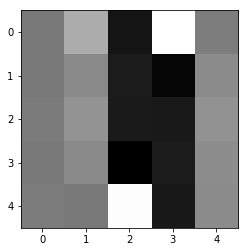

In [882]:
show_kernel(features1, 10, 13)

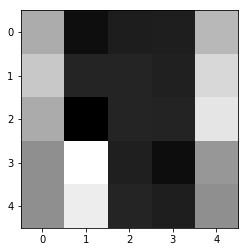

In [883]:
show_kernel(features2, 19, 14)

In [884]:
a, b, c, d = features1.shape
features = np.zeros((a, b, a, b, c, d))
m = np.zeros((a, b, a, b))

d = np.arange(kw*kh).reshape(kh, kw) + 1

for i1 in range(a):
    if i1 not in range(2, 17):
        continue
    for j1 in range(b):
        if j1 not in range(10, 16):
            continue
        f1 = features1[i1, j1]
        for i2 in range(a):
            for j2 in range(b):
                f2 = features2[i2, j2]
                features[i1, j1, i2, j2] = cv2.absdiff(f2, f1)
                m[i1, j1, i2, j2] = features[i1, j1, i2, j2].mean()
features.shape

(24, 24, 24, 24, 5, 5)

In [885]:
mx = m[m!=np.amin(m)]
for _ in range(0):
    mx = mx[mx!=np.amin(mx)]

mv = np.amin(mx)
indices = np.where(m == mv)
z = features[indices]
indices

(array([2], dtype=int64),
 array([10], dtype=int64),
 array([17], dtype=int64),
 array([10], dtype=int64))

In [886]:
i, j, k, l = indices
x = 0
mv

4.32

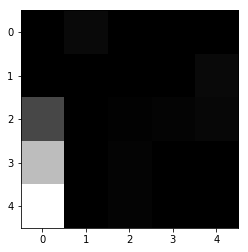

In [887]:
show_kernel(features1, i[x], j[x])

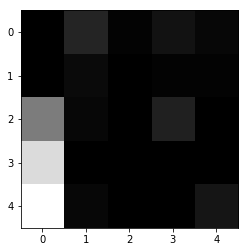

In [888]:
show_kernel(features2, k[x], l[x])

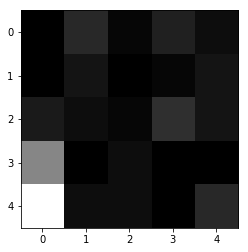

In [889]:
plt.imshow(features[i[x], j[x], k[x], l[x]][...,::-1], cmap='gray')

In [890]:
cv2.absdiff(features2[k[x], l[x]], features1[i[x], j[x]])

array([[ 2,  5,  1,  6,  0],
       [ 3,  1,  0,  3,  0],
       [ 3,  7,  1,  2,  4],
       [ 0,  0,  2,  0, 20],
       [ 6,  0,  2,  2, 38]], dtype=int8)

In [891]:
features1[i[x], j[x]]

array([[  0,   0,   0,   4,   0],
       [  4,   0,   0,   0,   0],
       [  3,   2,   1,   0,  30],
       [  0,   0,   2,   0,  80],
       [  0,   0,   2,   0, 108]], dtype=int8)

In [892]:
features2[k[x], l[x]]

array([[ 2,  5,  1, 10,  0],
       [ 1,  1,  0,  3,  0],
       [ 0,  9,  0,  2, 34],
       [ 0,  0,  0,  0, 60],
       [ 6,  0,  0,  2, 70]], dtype=int8)